In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from preprocessing import Preprocessor
from network import RNN

In [85]:
pp = Preprocessor(train_path="datasets/no1_train.csv", val_path="datasets/no1_validation.csv")
train_df, val_df, X_feat = pp.preprocess()
X_feat

['hydro',
 'micro',
 'thermal',
 'wind',
 'river',
 'total',
 'sys_reg',
 'flow',
 'min_day_sin',
 'min_day_sin',
 'day_week_sin',
 'day_week_cos',
 'month_year_sin',
 'month_year_cos',
 'y_24h',
 'y_prev']

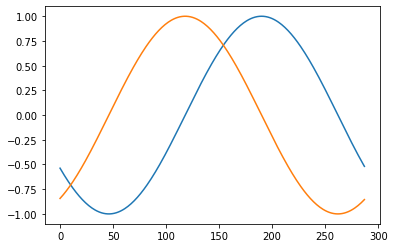

In [86]:

time_of_day_sin = train_df[["min_day_sin"]].to_numpy()
time_of_day_cos = train_df[["min_day_cos"]].to_numpy()
time_steps_day = 1440//5
plt.plot(time_of_day_sin[:time_steps_day])
plt.plot(time_of_day_cos[:time_steps_day])
plt.show()

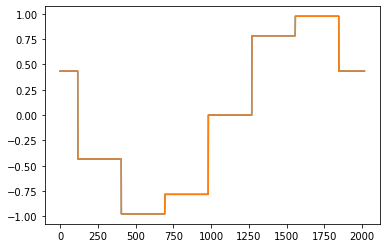

In [87]:
day_week_sin = train_df[["day_week_sin"]].to_numpy()
day_week_cos = train_df[["day_week_sin"]].to_numpy()
time_steps_day = (60 * 24 * 7)//5
plt.plot(day_week_sin[:time_steps_day])
plt.plot(day_week_cos[:time_steps_day])
plt.show()

In [88]:
date_time = pd.to_datetime(train_df["start_time"])
train_df["day_week"] = date_time.dt.day_of_week
one_hot_days = pd.get_dummies(train_df.day_week, prefix="day")
list(one_hot_days.columns)
train_df

/var/folders/zr/_vkv5pc53m5cdqgxd4n6qhfr0000gn/T/ipykernel_9124/649232387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["day_week"] = date_time.dt.day_of_week


,start_time,hydro,micro,thermal,wind,river,total,y,sys_reg,flow,min_day_sin,min_day_cos,day_week_sin,day_week_cos,month_year_sin,month_year_cos,y_24h,y_prev,day_week
288,2019-01-10 14:10:00,0.191042,-0.567966,-0.105058,-0.281682,-1.0,0.137997,-0.075570,0.271889,-0.583437,-0.537300,-0.843391,0.433884,-0.900969,0.5,8.660254e-01,-0.101918,-0.074404,3
289,2019-01-10 14:15:00,0.191042,-0.567966,-0.105058,-0.281682,-1.0,0.137997,-0.080538,0.271889,-0.583437,-0.555570,-0.831470,0.433884,-0.900969,0.5,8.660254e-01,-0.110724,-0.075570,3
290,2019-01-10 14:20:00,0.191042,-0.567966,-0.105058,-0.281682,-1.0,0.137997,-0.083400,0.271889,-0.583437,-0.573576,-0.819152,0.433884,-0.900969,0.5,8.660254e-01,-0.115621,-0.080538,3
291,2019-01-10 14:25:00,0.191042,-0.567966,-0.105058,-0.281682,-1.0,0.137997,-0.104558,0.271889,-0.583437,-0.591310,-0.806445,0.433884,-0.900969,0.5,8.660254e-01,-0.137165,-0.083400,3
292,2019-01-10 14:30:00,0.191042,-0.567966,-0.105058,-0.281682,-1.0,0.137997,-0.113847,0.271889,-0.583437,-0.608761,-0.793353,0.433884,-0.900969,0.5,8.660254e-01,-0.158632,-0.104558,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225083,2021-03-01 03:05:00,0.089101,-0.170621,0.564202,0.209443,-1.0,0.132078,-0.258721,0.271889,0.049804,0.722364,0.691513,0.000000,1.000000,1.0,6.123234e-17,-0.324962,-0.259187,0
225084,2021-03-01 03:10:00,0.089101,-0.170621,0.564202,0.209443,-1.0,0.132078,-0.268595,0.271889,0.049804,0.737277,0.675590,0.000000,1.000000,1.0,6.123234e-17,-0.311598,-0.258721,0
225085,2021-03-01 03:15:00,0.089101,-0.170621,0.564202,0.209443,-1.0,0.132078,-0.295397,0.271889,0.049804,0.751840,0.659346,0.000000,1.000000,1.0,6.123234e-17,-0.317948,-0.268595,0
225086,2021-03-01 03:20:00,0.089101,-0.170621,0.564202,0.209443,-1.0,0.132078,-0.289366,0.271889,0.049804,0.766044,0.642788,0.000000,1.000000,1.0,6.123234e-17,-0.318752,-0.295397,0


In [89]:
train_df = train_df.join(one_hot_days)
train_df = train_df.drop(columns=["day_week"])
train_df.iloc[1000]

start_time        2019-01-14 01:30:00
hydro                       -0.615055
micro                       -0.616586
thermal                       0.51751
wind                         -0.07008
river                            -1.0
total                       -0.590789
y                           -0.265169
sys_reg                      0.271889
flow                        -0.407656
min_day_sin                  0.382683
min_day_cos                   0.92388
day_week_sin                      0.0
day_week_cos                      1.0
month_year_sin                    0.5
month_year_cos               0.866025
y_24h                       -0.304456
y_prev                       -0.26856
day_0                               1
day_1                               0
day_2                               0
day_3                               0
day_4                               0
day_5                               0
day_6                               0
Name: 1288, dtype: object

In [90]:
date_time = pd.to_datetime(train_df["start_time"])
train_df["month_year"] = date_time.dt.month

# Getting one-hot encoding of month_year
one_hot_month = pd.get_dummies(train_df.month_year, prefix="month")
# List of the feature names
feats = list(one_hot_month.columns)
# Adding one-hot columns
train_df = train_df.join(one_hot_month)
# Dropping day_week
train_df = train_df.drop(columns=["month_year"])
train_df.columns

Index(['start_time', 'hydro', 'micro', 'thermal', 'wind', 'river', 'total',
       'y', 'sys_reg', 'flow', 'min_day_sin', 'min_day_cos', 'day_week_sin',
       'day_week_cos', 'month_year_sin', 'month_year_cos', 'y_24h', 'y_prev',
       'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')